In [8]:
# program to calculate RF response surface given DoE points and responses

import matplotlib.pyplot as plt
import numpy as np
import math 

import pandas as pd
from sklearn.preprocessing import scale # To scale the data
from sklearn import decomposition

import os
import random

os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(42)
random.seed(12345)

In [9]:
# reading data into a file
xydata = open('test_fun.txt','r').readlines()

x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []
x8 = []
x9 = []
x10 = []
x11 = []
x12 = []
corrosion_rate= []

for line in xydata:
    x1.append(float(line.split()[0]))
    x2.append(float(line.split()[1]))
    x3.append(float(line.split()[2]))
    x4.append(float(line.split()[3]))
    x5.append(float(line.split()[4]))
    x6.append(float(line.split()[5]))
    x7.append(float(line.split()[6]))
    x8.append(float(line.split()[7]))
    x9.append(float(line.split()[8]))
    x10.append(float(line.split()[9]))
    x11.append(float(line.split()[10]))
    x12.append(float(line.split()[11]))
    corrosion_rate.append(float(line.split()[12]))
    
print ('read finished')

read finished


In [10]:
# dimensional DoE points
x_dim = (np.vstack([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12])).transpose()

# Calculating number of DoE points for matrix x
n=int(x_dim.shape[0])

# Calculating number of dvs
ndv=int(x_dim.shape[1])
print ('n = {0:d} ndv = {1:d}'.format(n,ndv))

# scale x1 and x2 design variables to lie between 0 and 1
x1_scaled = []
x2_scaled = []
x3_scaled = []
x4_scaled = []
x5_scaled = []
x6_scaled = []
x7_scaled = []
x8_scaled = []
x9_scaled = []
x10_scaled = []
x11_scaled = []
x12_scaled = []

for i in range(0,n):
    x1_scaled.append((x1[i]-min(x1))/(max(x1)-min(x1)))
    x2_scaled.append((x2[i]-min(x2))/(max(x2)-min(x2)))
    x3_scaled.append((x3[i]-min(x3))/(max(x3)-min(x3)))
    x4_scaled.append((x4[i]-min(x4))/(max(x4)-min(x4)))
    x5_scaled.append((x5[i]-min(x5))/(max(x5)-min(x5)))
    x6_scaled.append((x6[i]-min(x6))/(max(x6)-min(x6)))
    x7_scaled.append((x7[i]-min(x7))/(max(x7)-min(x7)))
    x8_scaled.append((x8[i]-min(x8))/(max(x8)-min(x8)))
    x9_scaled.append((x9[i]-min(x9))/(max(x9)-min(x9)))
    x10_scaled.append((x10[i]-min(x10))/(max(x10)-min(x10)))
    x11_scaled.append((x11[i]-min(x11))/(max(x11)-min(x11)))
    x12_scaled.append((x12[i]-min(x12))/(max(x12)-min(x12)))
    
# vector of scaled DoE points
x_nondim = (np.vstack([x1_scaled,x2_scaled,x3_scaled,x4_scaled,x5_scaled,\
                      x6_scaled,x7_scaled,x8_scaled,x9_scaled,x10_scaled,x11_scaled,x12_scaled])).transpose()

# array of floats needed for use in ANN functions
x_scaled = np.array(x_nondim,dtype='float64')

# Now scale the objectives to lie between 0 and 1: objective 1 =
minobj1 = min(corrosion_rate)
denom1 = (max(corrosion_rate)-min(corrosion_rate))

o1 = []

for i in range(0,len(corrosion_rate)):
    o1.append((corrosion_rate[i]-minobj1)/denom1)
    
####################### GridsearchCV #######################

from sklearn.ensemble import RandomForestRegressor 

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

n = 1000 ndv = 12


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, o1_train, o1_test = train_test_split(x_scaled, o1, test_size = 0.30)   
    
# array of floats needed for use in ANN functions
obj1 = np.array(o1_train,dtype='float64')

# Surrogate modelling of objective using Random Forests
from sklearn.ensemble import RandomForestRegressor 

# create regressor object 
rf_regressor = RandomForestRegressor(n_estimators = 500, bootstrap=1, random_state = 1)
rf_cr = rf_regressor.fit(x_train, obj1)

obj_pred = rf_cr.predict(x_test)

In [12]:

# ----------------------------------------------------------------------------------------
# Single objective optimisation of corrosion using Random Forests
# ----------------------------------------------------------------------------------------
from scipy import optimize

def obj1_f(x): # function to be optimised
    xdash = np.zeros((1,12),dtype='float64') # need compatible data for optimizer
    xdash[0][0] = x[0]
    xdash[0][1] = x[1]
    xdash[0][2] = x[2]
    xdash[0][3] = x[3]
    xdash[0][4] = x[4]
    xdash[0][5] = x[5]
    xdash[0][6] = x[6]
    xdash[0][7] = x[7]
    xdash[0][8] = x[8]
    xdash[0][9] = x[9]
    xdash[0][10] = x[10]
    xdash[0][11] = x[11]    
    return rf_cr.predict(xdash)

# testing obj1_f for data input compatibility
x = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
yval = obj1_f(x)
 
bnds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))     # set optimisation bounds

optmethod = "Powell"   # set optimisation method

# optimise with scipy functions
if (optmethod=="Nelder-Mead"):
    res = optimize.minimize(obj1_f,x, bounds=bnds, method="Nelder-Mead")
elif (optmethod=="Powell"):
      res = optimize.minimize(obj1_f,x, bounds=bnds, method="Powell")

# Transforming normalized parameters to physical space

x1opt = res.x[0]*(max(x1)-min(x1))+min(x1)
x2opt = res.x[1]*(max(x2)-min(x2))+min(x2)
x3opt = res.x[2]*(max(x3)-min(x3))+min(x3)
x4opt = res.x[3]*(max(x4)-min(x4))+min(x4)
x5opt= res.x[4]*(max(x5)-min(x5))+min(x5)
x6opt = res.x[5]*(max(x6)-min(x6))+min(x6)
x7opt = res.x[6]*(max(x7)-min(x7))+min(x7)
x8opt = res.x[7]*(max(x8)-min(x8))+min(x8)
x9opt = res.x[8]*(max(x9)-min(x9))+min(x9)
x10opt = res.x[9]*(max(x10)-min(x10))+min(x10)
x11opt = res.x[10]*(max(x11)-min(x11))+min(x11)
x12opt = res.x[11]*(max(x12)-min(x12))+min(x12)
        
print("Optimal values Erev_H = {0:10.5e} b_H = {1:10.5e} del_H = {2:10.5e} del_H2CO3 = {3:10.5e} Iref_H = {4:10.5e}\
      a1_H = {5:10.5e} Iref_H2CO3 = {6:10.5e} a1_H2CO3 = {7:10.5e} cCO2ref_Fe = {8:10.5e}\
          delH_Fe = {9:10.5e} Erev_Fe = {10:10.5e} b_Fe = {11:10.5e}"\
      .format(x1opt, x2opt, x3opt,x4opt, x5opt, x6opt, x7opt,\
              x8opt, x9opt, x10opt, x11opt, x12opt))
    
print("optimal value {0:10.5e}".format(res.fun))
xopt = res.x[0]
yopt = res.x[1]
optval = res.fun


Optimal values Erev_H = -2.12174e-01 b_H = 1.12872e-01 del_H = 2.79855e+04 del_H2CO3 = 5.35956e+04 Iref_H = 5.52353e-02      a1_H = 4.25888e-01 Iref_H2CO3 = 5.29041e-02 a1_H2CO3 = -4.76462e-01 cCO2ref_Fe = 2.97892e-02          delH_Fe = 4.05464e+04 Erev_Fe = -4.84736e-01 b_Fe = 3.59957e-02
optimal value 1.41867e-01


In [13]:
data = {'Parameters':['Erev_H','b_H','del_H','del_H2CO3','Iref_H','a1_H','Iref_H2CO3','a1_H2CO3','cCO2ref_Fe','delH_Fe',
                     'Erev_Fe','b_Fe'],'Values':[x1opt,x2opt,x3opt,x4opt,x5opt,x6opt,x7opt,x8opt,x9opt,x10opt,x11opt,x12opt]}

df = pd.DataFrame(data)

df = df.round(3)

df.loc[2, 'Values'] = round(df.loc[2, 'Values'], 0)
df.loc[3, 'Values'] = round(df.loc[3, 'Values'], 0)
df.loc[9, 'Values'] = round(df.loc[9, 'Values'], 0)

Mean Square Error = 0.012111595060815866
Root Mean Square Error = 0.11005269220158072
R-sqaure = 0.6817496997042467


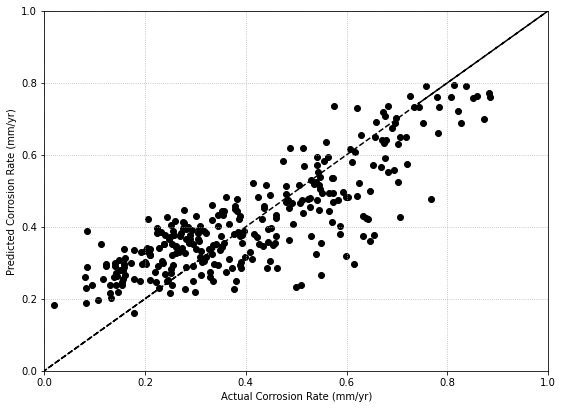

In [14]:
# calculate RMSE for cross validation
MSE = np.square(np.subtract(obj_pred,o1_test)).mean()   
print("Mean Square Error = {0:2}".format (MSE))  


RMSE = math.sqrt(MSE)  
print("Root Mean Square Error = {0:2}".format (RMSE))  

from sklearn.metrics import r2_score
R2= r2_score(o1_test,obj_pred)

print("R-sqaure = {0:2}".format (R2)) 



fig = plt.figure()
fig = plt.gcf()
fig.set_size_inches(7,5)

ax = fig.add_axes([0,0,1,1])

#plt.rc('grid', linestyle="-", color='black')

plt.plot(o1,o1,color='black',linestyle='dashed')

plt.scatter(o1_test,obj_pred,marker="o",color='black')


plt.xlim(0,1)
plt.ylim(0,1)

# plt.legend (['Current model','Empirical correlation','Nesic et al.(1995)'], loc='upper left')

plt.xlabel ("Actual Corrosion Rate (mm/yr)")
plt.ylabel ("Predicted Corrosion Rate (mm/yr)")
plt.grid(linestyle=':')
    
plt.savefig('RF Predictions',bbox_inches='tight', dpi=150)

plt.show()
